In [ ]:
# Linear algebra basics

This notebook provides in introduction to essential elements of linear algebra needed to understand the dimensionality reduction algorithms performed by *flowTorch*.

## Multiplication
### Matrix-vector multiplication
### Matrix-matrix multiplication

## Special types of matrices
### Identity matrix
### Orthogonal matrix
### Orthonormal matrix
### Unitary matrix

## Eigen-decomposition
### ...
### Application to linear operators

## Singular value decomposition
### ...
### Low-rank approximation
### Least-squares approximation
### Connection so Eigen-decomposition

# The N-dimensional array 
### An N-dimensional is a multidimensional container of items of the same type and size. The number of dimensions and items in an array is defined by its shape, which is a tuple of N non-negative integers that specify the sizes of each dimension.


## Vector
###  is a geometric object that has magnitude (or length) and direction.

[6, 3, 4]


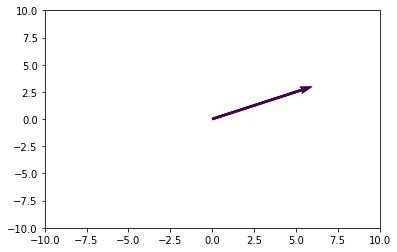

In [183]:
import torch
import matplotlib.pyplot as plt

vector = [6, 3, 4]
V = torch.tensor(vector)
print(vector)
plt.quiver([0, 0, 0],[0, 0 , 0], [6], [3], [7] , angles='xy', scale_units='xy', scale=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## Matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [0, 0, 0]])


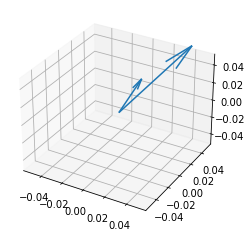

In [211]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt 
import numpy as np 

Matrix = [[1, 2, 3], [4, 5, 6],[0, 0, 0]]
M = torch.tensor ( Matrix )
print(M)


fig = plt.figure()
ax = fig.gca(projection='3d')



origin = torch.tensor([[0,0,0],[0,0,0],[0,0,0]])

plt.quiver(*origin, M[:,0], M[:,1], M[:,2], length=0.01)

plt.show()

## 3D Tensor of size 3x2x2
### a Tensor is an algebraic object that describes a (multilinear) relationship between sets of algebraic objects related to a vector space.

In [218]:
Tensor = [[[4, 2], [1, 7], [8, 9]],
          [[5, 6], [7, 8],[9, 10]],
          [[5, 6], [7, 8],[9, 10]]]
T = torch.tensor(Tensor)
print(T)



tensor([[[ 4,  2],
         [ 1,  7],
         [ 8,  9]],

        [[ 5,  6],
         [ 7,  8],
         [ 9, 10]],

        [[ 5,  6],
         [ 7,  8],
         [ 9, 10]]])


# Dot product
## The product of two vectors to form a scalar, whose value is the product of the magnitudes of the vectors and the cosine of the angle between them. Written: A· B or AB

In [304]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from torch.autograd import Function
torch.pi = torch.acos(torch.zeros(1)).item() 
x = torch.tensor([1,2,3])
y = torch.tensor([-7,8,9])
torch.dot(x,y)
36
dot = torch.dot(x,y)
print(dot)
x_modulus = np.sqrt((x*x).sum())
y_modulus = np.sqrt((y*y).sum()) 
cos_angle = dot / x_modulus / y_modulus # cosine of angle between x and y
angle = torch.acos(cos_angle)
Angel_in_degrees = angle * 360 / 2 / torch.pi # angle in degrees

print(Angel_in_degrees)


tensor(36)
tensor(92.6168, dtype=torch.float64)


intersection point p0
theta= 1.2490457723982544 ,theta in degree= 71.56505117707799 

intersection point p1
theta= 4.3906384259880475 ,theta in degree= 251.565051177078 

intersection point p2
theta= 0.982793723247329 ,theta in degree= 56.309932474020215 

intersection point p3
theta= 4.124386376837122 ,theta in degree= 236.3099324740202 



Text(-0.5547001962252291, -0.8320502943378437, 'p4')

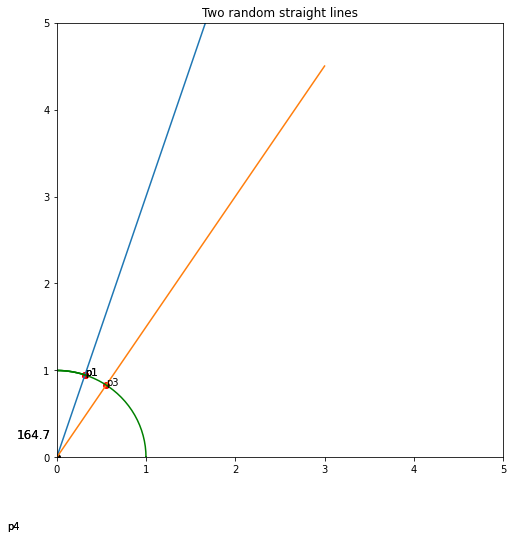

In [302]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from torch.autograd import Function
m1, b1 = (3), 0.0 # slope and intercept for line 1
m2, b2 = (3/2), 0.0 # slope and intercept for line 2
x = np.linspace(-3,3,100)
plt.figure(figsize=(8,8))
plt.xlim(0,5)
plt.ylim(0,5)
plt.title('Two random straight lines')
plt.plot(x,x*m1+b1)  # plotting line 1
plt.plot(x,x*m2+b2)  # plotting line 2

x0 = (b2-b1)/(m1-m2)
y0 = m1*x0 + b1
plt.scatter(x0,y0, color='black')

theta = np.linspace(0,2*np.pi,100)  # 0 <= θ <= 2π
r =  1.0 #circle radius
x1 = r * np.cos(theta) + x0
x2 = r * np.sin(theta) + y0
plt.plot(x1, x2, color='green')

x_points = []
y_points = []
def intersection_points(slope,intercept,x0,y0,radius):
    
    a = 1 + slope**2  # 1+m^2
    b = -2.0*x0 + 2*slope*( intercept - y0 )  # 2m(c1-y0) - 2x0
    c = x0**2 + (intercept-y0)**2 - radius**2 # x0^2+(c1-y0)^2-r^2
    # solving the quadratic equation:
    
    delta = b**2 - 4.0*a*c  # b^2 - 4ac
    x1 = ( -b + np.sqrt(delta) ) / ( 2.0 * a )   
    x2 = ( -b - np.sqrt(delta) ) / ( 2.0 * a )
    x_points.append(x1)
    x_points.append(x2)
    y1 = slope*x1 + intercept
    y2 = slope*x2 + intercept
    y_points.append(y1)
    y_points.append(y2)
    return None
# Finding the intersection points for line1 with circle
intersection_points(m1,b1,x0,y0,r)  
# Finding the intersection points for line1 with circle
intersection_points(m2,b2,x0,y0,r)  
# Plotting the different intersection points.
plt.scatter( x_points[0], y_points[0], color='red' )

plt.scatter( x_points[2], y_points[2], color='red' ) 

# Naming the points.
plt.text( x_points[0], y_points[0], 'p1', color='black' )

plt.text( x_points[2], y_points[2], 'p3', color='black' )


def get_angle(x,y,x0,y0,radius):
    base = x - x0
    hypotenuse = radius
    # calculating the angle for a intersection point 
    # which is equal to the cosine inverse of (base / hypotenuse)
    
    theta = np.arccos(base / hypotenuse)  
    if y-y0 < 0:
        theta = 2*np.pi - theta 
        
    print('theta=',theta,',theta in degree=',np.rad2deg(theta),'\n')
    return theta
theta_list = []
for i in range(len(x_points)):
    x = x_points[i]
    y = y_points[i]
    print('intersection point p{}'.format(i))
    theta_list.append( get_angle(x,y,x0,y0,r) )
    
    # angle for intersection point1 ( here point p1 is taken)    
p1 = theta_list[0]  
# angle for intersection point2 ( here point p4 is taken)
p2 = theta_list[3]  
# all the angles between the two intesection points
theta = np.linspace(p1, p2, 100) 
# calculate the x and y points for 
# each angle between the two intersection points
x1 = r * np.cos(theta) + x0
x2 = r * np.sin(theta) + y0
# plot the angle
plt.plot(x1, x2, color='green')
# Code to print the angle at the midpoint of the arc.
mid_angle = ( p1 + p2) / 2.0
x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
angle_in_degree = round( np.rad2deg(abs(p1-p2)),1)
plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
# plotting the intersection points
plt.scatter( x_points[0], y_points[0], color='red' )
plt.scatter( x_points[3], y_points[3], color='red' )
plt.text( x_points[0], y_points[0], 'p1', color='black' )
plt.text( x_points[3], y_points[3], 'p4', color='black' )# angle for intersection point1 ( here point p1 is taken)    
p1 = theta_list[0]  
# angle for intersection point2 ( here point p4 is taken)
p2 = theta_list[3]  
# all the angles between the two intesection points
theta = np.linspace(p1, p2, 100) 
# calculate the x and y points for 
# each angle between the two intersection points
x1 = r * np.cos(theta) + x0
x2 = r * np.sin(theta) + y0
# plot the angle
plt.plot(x1, x2, color='green')
# Code to print the angle at the midpoint of the arc.
mid_angle = ( p1 + p2) / 2.0
x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
angle_in_degree = round( np.rad2deg(abs(p1-p2)),1)
plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
# plotting the intersection points
plt.scatter( x_points[0], y_points[0], color='red' )
plt.scatter( x_points[3], y_points[3], color='red' )
plt.text( x_points[0], y_points[0], 'p1', color='black' )
plt.text( x_points[3], y_points[3], 'p4', color='black' )